In [3]:
import pandas as pd
fbref = pd.read_csv('fbref_outfield_player_stats_Big-5-European-Leagues_2020-2021_last_updated_01092021.csv')
df1 = fbref[fbref['Pos'].apply(lambda x:x in ['FW','MF,FW','FW,MF'])]
all_player = df1.sort_values(by=['Min'],ascending = False,na_position='first')
# Display all rows where Min >= 1500 #500 players
minute = '1500'
age='26'
fw_filter1 = all_player[all_player['Age'].astype('int64')<=int(age)] #กรองแค่ Age Position
#Display all rows where Age <=26
fw_filter2 = fw_filter1[fw_filter1['Min'].astype('int64') >=int(minute)] #กรอง Min Age Position

#จำนวนข้อมูลที่ซ้ำ
print(len(fw_filter2[fw_filter2.duplicated(['Player'], keep = False)])) 
# Remove the duplicates
fw_filter2.drop_duplicates(['Player'], inplace=True)
# Reset dataframe index after drop_duplicates.
fw_filter2.reset_index(drop=True, inplace=True)
#print(fw_filter2)

fw_filter3 = fw_filter2.dropna()
#ข้อมูลซ้ำ
fw_filter3.duplicated('Player', keep = False) 
#จำนวนข้อมูลที่ซ้ำ
print(len(fw_filter3[fw_filter3.duplicated(['Player'], keep = False)])) 
# Remove the duplicates
fw_filter3.drop_duplicates(['Player'], inplace=True)
# Reset dataframe index after drop_duplicates.
fw_filter3.reset_index(drop=True, inplace=True)
#print(fw_filter3)



'''
by_Comp = fw_filter3.groupby('Comp')['Player'].count()
print(by_Comp)
'''
#แยกเป็นตัวแปรง่ายกว่า
FR = fw_filter2.loc[fw_filter2["Comp"] == "fr Ligue 1"]
FR.drop(columns=["Compl","Mn/Start","SoT%","Sh/90","SoT/90",'G/Sh',"G/SoT","Dist","npxG/Sh","Cmp%.3","Tkl%","Won%"],inplace=True)
FR.dropna(inplace=True)
FR.drop_duplicates(inplace=True)
fr = FR[FR['Min'].astype('int64') >=int(minute)] #กรอง Min Age Position
#print(fr.to_string())
print(len(fr[fr.duplicated(['Player'], keep = False)])) 
#FR.dropna(inplace=True)


bundes = fw_filter3.loc[fw_filter3["Comp"] == "de Bundesliga"]
laliga = fw_filter3.loc[fw_filter3["Comp"] == "es La Liga"]
PL = fw_filter2.loc[fw_filter2["Comp"] == "eng Premier League"]
PL.drop(columns=["Compl","Mn/Start","SoT%","Sh/90","SoT/90",'G/Sh',"G/SoT","Dist","npxG/Sh","Cmp%.3","Tkl%","Won%"],inplace=True)
PL.dropna(inplace=True)
PL.drop_duplicates(inplace=True)
pl = PL[PL['Min'].astype('int64') >=int(minute)] #กรอง Min Age Position
pl.reset_index(inplace=True)
##print(pl.to_string())
#drop ค่า outlier
#index = [ 29  ,36 , 80 ,100 ,105 ,142, 176 ,178 ,186 ,402 ,433]
#pl.drop(index=index,inplace=True)
#print(pl)

calcio = fw_filter3.loc[fw_filter3["Comp"] == "it Serie A"]
'''
print("------------------Bundesliga GER-----------------")
print(bundes.head(2))
print("--------------------Laliga ESP------------------")
print(laliga.head(2))
print("----------------------EPL-----------------------")
print(pl.head(2))
print("-----------------Calcio Serie A------------------")
print(calcio.head(2))

'''



0


C:\Users\User\AppData\Local\Temp\ipykernel_14876\394782316.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fw_filter2.drop_duplicates(['Player'], inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_14876\394782316.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fw_filter3.drop_duplicates(['Player'], inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_14876\394782316.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

0
0


C:\Users\User\AppData\Local\Temp\ipykernel_14876\394782316.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PL.drop_duplicates(inplace=True)


'\nprint("------------------Bundesliga GER-----------------")\nprint(bundes.head(2))\nprint("--------------------Laliga ESP------------------")\nprint(laliga.head(2))\nprint("----------------------EPL-----------------------")\nprint(pl.head(2))\nprint("-----------------Calcio Serie A------------------")\nprint(calcio.head(2))\n\n'

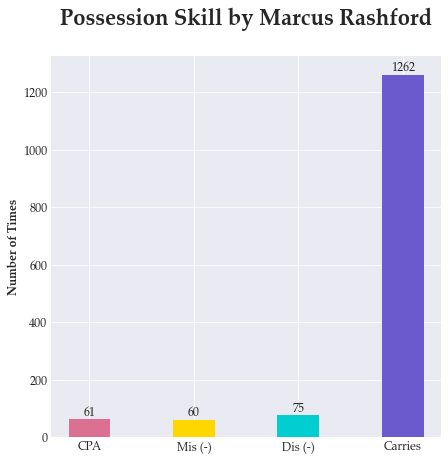

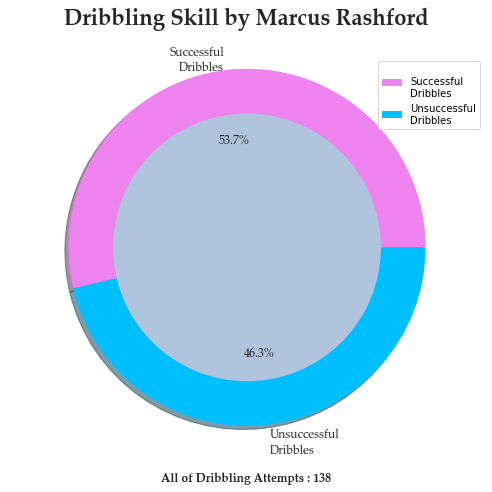

In [5]:
import matplotlib.pyplot as plt
#from adjustText import adjust_text
pl_carries = pl[["Player","Carries","CPA","Mis","Dis","Succ%","Succ"]]
pl_carries.reset_index(inplace=True,drop=True)

from tkinter import *
from tkinter.ttk import *
import pandas as pd
s = set(pl["Player"])
s = list(s)
window = Tk()
window.geometry("300x300")
txt = Label(window, text="show index ")
txt.grid(column=1, row=0)
##entry = Entry(window)
##entry.grid(column=1,row=3)
def selectPlayer(player):
    x = pl[pl["Player"] == player]
    for i in x.index:
        return int(i) 
def onclick():
    op = combo.get()
    txt.configure(text=selectPlayer(op))
    carries = pl_carries["Carries"][selectPlayer(op)]
    cpa = pl_carries["CPA"][selectPlayer(op)]
    Mis = pl_carries["Mis"][selectPlayer(op)]
    Dis = pl_carries["Dis"][selectPlayer(op)]
    succ_per = pl_carries["Succ%"][selectPlayer(op)]
    succ = pl_carries["Succ"][selectPlayer(op)]
    #bar chart CPA Mis Dis
    with plt.style.context("seaborn-dark"):
        player_name = pl_carries["Player"][selectPlayer(op)]
        plt.rcParams['font.family'] = 'Palatino Linotype'
        plt.rcParams['font.size'] = 12
        plt.subplots(figsize=(7,7))
        k=plt.bar("CPA",float(cpa),label='Carries into 18-yard box',color ="palevioletred",width=0.4)
        l=plt.bar("Mis (-)",float(Mis),label='Failed when attempting\nto gain control the ball',color='gold',width=0.4)
        m=plt.bar("Dis (-)",float(Dis),label='Loses control the ball\nby being tackled\nexclude attempted\ndribbles',color='darkturquoise',width=0.4)
        q = plt.bar("Carries",float(carries),label="Carries the ball",color='slateblue',width=0.4)
        
        plt.bar_label(k,fmt='%.0f')
        plt.bar_label(l,fmt='%.0f')
        plt.bar_label(m,fmt='%.0f')
        plt.bar_label(q,fmt='%.0f')
        plt.title('Possession Skill by {}\n'.format(player_name),fontweight='bold',fontsize='22')
        plt.ylabel('Number of Times',fontweight='bold')
        plt.grid()

    with plt.style.context("seaborn-dark"):
        player_name = pl_carries["Player"][selectPlayer(op)]
        plt.rcParams['font.family'] = 'Palatino Linotype'
        plt.rcParams['font.size'] = 12
        plt.subplots(figsize=(7,7))
        ls_label = ['\nSuccessful\nDribbles','Unsuccessful\nDribbles']
        ls_color = ["violet","deepskyblue"]
        all_attempt = (float(succ)/float(succ_per))*100
        unsucc = all_attempt- float(succ)
        ls_data = [float(succ),unsucc]
        plt.pie(ls_data,labels=ls_label,explode=(0,0),shadow=True,colors=ls_color,autopct='%1.1f%%')
        plt.axis('equal')
        circle = plt.Circle(xy=(0,0),radius=.75,facecolor='lightsteelblue')
        plt.title('Dribbling Skill by {}\n'.format(player_name),fontweight='bold',fontsize='22')
        plt.xlabel('\n\nAll of Dribbling Attempts : {}'.format(round(all_attempt)),fontweight='bold')
        plt.gca().add_artist(circle)
        plt.tight_layout()

butt = Button(window, text="click", command=onclick)
butt.grid(column=2,row=1)
combo = Combobox(window)
combo["values"] = s
combo.grid(column=1,row=1)
window.mainloop()
plt.legend()
plt.show()

In [ ]:
#Pressure defensive action by attackers
import matplotlib.pyplot as plt
from adjustText import adjust_text
pl_pressure = pl[["Player","%","Mid 3rd.1","Att 3rd.1",'Def 3rd.1']]
pl_pressure.reset_index(inplace=True,drop=True)
from tkinter import *
from tkinter.ttk import *
import pandas as pd
s = set(pl["Player"])
s = list(s)
window = Tk()
window.geometry("300x300")
txt = Label(window, text="show index ")
txt.grid(column=1, row=0)
##entry = Entry(window)
##entry.grid(column=1,row=3)
def selectPlayer(player):
    x = pl[pl["Player"] == player]
    for i in x.index:
        return int(i) 

butt = Button(window, text="click", command=onclick)
butt.grid(column=2,row=1)
combo = Combobox(window)
combo["values"] = s
combo.grid(column=1,row=1)
window.mainloop()
def onclick():
    op = combo.get()
    txt.configure(text=selectPlayer(op))
    percent = pl_pressure["%"][selectPlayer(op)]
    mid3rd = pl_pressure["Mid 3rd.1"][selectPlayer(op)]
    def3rd = pl_pressure["Def 3rd.1"][selectPlayer(op)]
    att3rd = pl_pressure["Att 3rd.1"][selectPlayer(op)]
    with plt.style.context("seaborn-dark"):
        player_name = pl_carries["Player"][selectPlayer(op)]
        plt.rcParams['font.family'] = 'Palatino Linotype'
        plt.rcParams['font.size'] = 12
        plt.subplots(figsize=(7,7))
        ls_label = ['Pressing in the\ndefensive third zone','Pressing in the\nmiddle third zone','Pressing in the\nfinal third zone']
        ls_color = ["violet","deepskyblue","gold"]
        ls_data = [float(def3rd),float(mid3rd),float(att3rd)]
        plt.pie(ls_data,labels=ls_label,explode=(0,0,0),shadow=True,colors=ls_color,autopct='%1.1f%%')
        plt.axis('equal')
        plt.xlabel("{} : Successful Pressure Percentage\nmean % of time the squad gained possession\nwithin 5 seconds of applying pressure\n**minimum 6.44 pressures per squad game\nto qualify as a leader".format(float(percent)),fontweight = "bold")
        circle = plt.Circle(xy=(0,0),radius=.75,facecolor='lightsteelblue')
        plt.title("Pressures to the opponent's player\nby {} in each zone".format(player_name),fontweight='bold',fontsize='20')

        plt.gca().add_artist(circle)
        plt.tight_layout()
plt.legend()
plt.show()